# Wrangle and Analyze Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering data</a></li>
<li><a href="#assessing">Assessing data</a></li>
<li><a href="#cleaning">Cleaning data</a></li>
<li><a href="#storing">Storing, analyzing and visualizing wrangled data</a></li>
</ul>

<a id='intro'></a>
## Introduction

In the Wrangle and Analyze Data project we will walk through each of the steps to properly wrangle the WeRateDog Twitter data and create interesting and trustworthy analyses and visualizations. 

In the **Gathering data** section, we will collect 3 pieces of information:
1. The WeRateDog Twitter archive, which was made available for manual download from Udacity's Project Resources
2. The image-predictions.tsv file, which we will download programmatically directly from Udacity's servers
3. Retweet Count and Favorite Count data are not available in the data sources listed previously, thus we create a Twitter API and we will use the tweet IDs in the WeRateDogs Twitter archive to query the API and collect the missing data

The **Assessing data** section will be reserved to assess them visually and programmatically for quality and tidiness issues. 

Throughout the **Cleaning data** section we will clean each of the issues documented while assessing. 

Finally, in the last section **Storing, analyzing and visualizing wrangled data**, we will store the clean DataFrames in CSV files We will also analyze and visualize the wrangled data in this Jupyter Notebook. 

Let's start the work.

<a id='gathering'></a>
## Gathering data

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the WeRateDogs Twitter archive into a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download image-predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
# Read image-predictions.tsv file into a DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# Create Tweepy API object
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# Read tweet_ids from twitter-archive-enhanced.csv file into a list
tweet_id_list = image_predictions['tweet_id']

# Query the Twitter API for each tweet's JSON data using Tweepy library 
#   and store it in the tweet_json.txt file
data = {}
id_errors = []

start = time.time()

with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_id_list:
        try:
            data = api.get_status(tweet_id, text_mode='extended')
            file.write(json.dumps(data._json) + '\n')
        except Exception as e:
            id_errors.append(print('No status found with ID {}'.format(tweet_id)))

end = time.time()
print(end - start)

No status found with ID 680055455951884288


Rate limit reached. Sleeping for: 582


No status found with ID 754011816964026368
No status found with ID 759566828574212096
No status found with ID 771004394259247104
No status found with ID 779123168116150273
No status found with ID 802247111496568832
No status found with ID 829374341691346946


Rate limit reached. Sleeping for: 588


No status found with ID 837012587749474308
No status found with ID 837366284874571778
No status found with ID 842892208864923648
No status found with ID 844704788403113984
No status found with ID 851953902622658560
No status found with ID 861769973181624320
No status found with ID 872261713294495745
No status found with ID 873697596434513921
No status found with ID 888202515573088257
1907.57537317276


In [7]:
# Read the tweet_json.txt file into a pandas DataFrame 
json_list = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id']
        favorite_counts = data['favorite_count']
        retweet_counts = data['retweet_count']
        
        json_list.append({'tweet_id': tweet_id,
                          'favorite_counts': favorite_counts,
                          'retweet_counts': retweet_counts})
        
rt_fav_counts = pd.DataFrame(json_list, columns=['tweet_id', 'favorite_counts', 'retweet_counts'])

<a id='assessing'></a>
## Assessing data

In [8]:
# Display the WeRateDogs twitter archive table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
# Display the image predictions table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
# Display the Retweet and Favorites count table
rt_fav_counts

,tweet_id,favorite_counts,retweet_counts
0,666020888022790149,2424,463
1,666029285002620928,121,42
2,666033412701032449,113,41
3,666044226329800704,274,133
4,666049248165822465,97,41
...,...,...,...
2054,891327558926688256,37928,8535
2055,891689557279858688,39714,7909
2056,891815181378084864,23631,3798
2057,892177421306343426,31362,5735


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
rt_fav_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2059 non-null   int64
 1   favorite_counts  2059 non-null   int64
 2   retweet_counts   2059 non-null   int64
dtypes: int64(3)
memory usage: 48.4 KB


In [14]:
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [15]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
1456,695314793360662529,NaN,NaN,2016-02-04 18:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Colin. He really likes green beans. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695314793...,10,10,Colin,None,None,None,None
305,836260088725786625,NaN,NaN,2017-02-27 17:01:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She spent all morning overseeing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,None,None,None,None
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
267,841680585030541313,NaN,NaN,2017-03-14 16:01:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a dragon slayer. Feared b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841680585...,12,10,Penny,None,None,None,None
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",12,10,None,None,None,None,None
1919,674269164442398721,NaN,NaN,2015-12-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674269164...,8,10,Bob,None,None,None,None
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None


In [16]:
twitter_archive.duplicated().sum()

0

In [17]:
image_predictions.duplicated().sum()

0

In [18]:
rt_fav_counts.duplicated().sum()

0

### Quality

`twitter_archive` table:
- Trailing +0000 in timestamp column
- Timestamp data type as object, not datetime
- Ids as float not string (columns in_reply_to_status_id, and in_reply_to_user_id)
- tweet_id column as integer, not string
- Nulls represented as "None" in doggo, floofer, pupper, puppo
- In reply to users often doesn't contain image
- invalid names in name column (i.e. 'this', 'one', 'just', 'actually', 'all', 'my', 'an', 'old', 'actually', 'the', 'by', 'officially', 'life', 'light', 'space', 'quite', 'a')
- 'O' registered as name instead of 'O'Malley' for tweet_id '776201521193218049'
- 'his' registered as name instead of 'Quizno' for tweet_id '748692773788876800'
- Retweets included in the table which may cause duplicates in tweets
- Columns source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls not needed
- ratings_numerator and ratings_denominator columns should be represented as one column named rating 


`image_predictions` table:
- tweet_id column as integer, not string
- Names in different patterns (separated by _ or - and sometimes in capitals, sometimes in lower case in columns p1, p2 and p3)
- Different number of digits after decimal point (columns p1_conf, p2_conf and p3 conf)

`rt_fav_counts` table:
- tweet_id column as integer, not string

### Tidiness

`twitter_archive` table:
- Four columns as variables (doggo, floofer, pupper, puppo)
- text column should be split in two columns, text and url columns

`image_predictions` table:
- Columns p1, p1_conf, p1_dog, etc should be converted to rows (i.e. unpivoted) and new column names should be renamed

`master dataset`:
- `rt_fav_counts` as well as `image_predictions` should be part of `twitter_archive` table, therefore merged and stored in a file called twitter_archive_master.csv.

<a id='cleaning'></a>
## Cleaning data

In [19]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
rt_fav_counts_clean = rt_fav_counts.copy()

### Quality

### Twitter Archive table

**`timestamp` column:** trailing characters +0000 and erroneous datatype 

##### Define

Remove characters '+0000' from column timestamp and convert it to datetime

##### Code

In [20]:
# Remove trailing '+0000'
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].map(lambda x: x.rstrip(r'^+0000$'))

# Convert timestamp column to datetime datatype
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test

In [21]:
print(twitter_archive_clean['timestamp'].dtypes)

datetime64[ns]


**`tweet_id` column:** as **integer** not **string**

##### Define

Convert column tweet_id from integer to string

##### Code

In [22]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

##### Test

In [23]:
print(twitter_archive_clean['tweet_id'].dtypes)

object


**`doggo`, `floofer`, `pupper`, `puppo` columns:** Nulls represented as "None"

##### Define

Replace 'None' string with nulls in `doggo`, `floofer`, `pupper`, `puppo`, `name` columns

##### Code

In [24]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo', 'name']

for each in twitter_archive_clean[dog_stages]:
    twitter_archive_clean[each].replace('None', np.nan, inplace=True)

##### Test

In [25]:
print(twitter_archive_clean[dog_stages].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    97 non-null     object
 1   floofer  10 non-null     object
 2   pupper   257 non-null    object
 3   puppo    30 non-null     object
 4   name     1611 non-null   object
dtypes: object(5)
memory usage: 92.2+ KB
None


**In reply to users often doesn't contain image**


##### Define

Tweets which doesn't contain images has empty value in the column expanded_url, therefore observations that meet this criterion should be removed.

##### Code

In [26]:
# Remove rows which expanded_urls column is empty
twitter_archive_clean.dropna(subset=['expanded_urls'], inplace=True)

##### Test

In [27]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

**`name` column:** invalid names

##### Define

Column text often starts with 'This is [dog name]...'. However, by carefully observing the text column, some tweets starts with 'This is..' but doesn't follow by a dog name, therefore name column was incorrectly inferred for those cases. 

To fix this issue, first we create a list of words mistaken by dog names, and then replace each instance in the column name that matches with the words in the list.

##### Code

In [28]:
# List of instances where dog names were incorrectly inferred
words = (['this', 'one', 'just', 'actually', 'all', 'my', 'an', 'old', 'actually', 
          'the', 'by', 'officially', 'life', 'light', 'space', 'quite', 'a'])

# Replace invalid names with nulls
for name in twitter_archive_clean['name']:
    if name in words:
        twitter_archive_clean.loc[twitter_archive_clean['name'] == name, ['name']] = np.nan

##### Test

In [29]:
irregular_count = 0

for name in twitter_archive_clean['name']:
    if name in words:
        irregular_count += 1

if irregular_count > 0:
    print('{} irregular names found'.format(irregular_count))
else:
    print('Irregular names not found.')

Irregular names not found.


**`name` column:** 
- 'O' registered as name instead of 'O'Malley' for tweet_id '776201521193218049'
- 'his' registered as name instead of 'Quizno' for tweet_id '748692773788876800'

In [30]:
twitter_archive_clean.query('tweet_id == "776201521193218049" or tweet_id == "748692773788876800"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,NaN,NaN,NaN,NaN
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo,NaN,NaN,NaN


##### Define

Query the dataframe on tweet_id and assign correct names.

##### Code

In [31]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == '776201521193218049', ['name']] = "O'Malley"
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == '748692773788876800', ['name']] = 'Quizno'

##### Test

In [32]:
twitter_archive_clean.query('tweet_id == "776201521193218049" or tweet_id == "748692773788876800"')['name']

775    O'Malley
992      Quizno
Name: name, dtype: object

Retweets included in the table which may cause duplicates in tweets

##### Define

We only want original tweets (no retweets). Retweets can be identified by the retweeted_status_id column, thus we will keep observations for which retweeted_status_id value is empty.

##### Code

In [33]:
# Exclude observations which are retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

##### Test

In [34]:
twitter_archive_clean.retweeted_status_id.notnull().sum()

0

**`source`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and `expanded_urls` columns:** not necessary for out analysis

##### Define

Remove columns which are not relevant for our analysis.

##### Code

In [35]:
(twitter_archive_clean.drop(columns=
                            ['source', 
                             'retweeted_status_id', 
                             'retweeted_status_user_id', 
                             'retweeted_status_timestamp', 
                             'expanded_urls']).head(3))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN


**`ratings_numerator` and `ratings_denominator` columns:** should be represented as one column named rating.

##### Define

Divide column rating_numerator by rating_denominator and assign to a new column called rating. Then, delete rating_numerator and rating_denominator as we won't need them for our analysis.

##### Code

In [36]:
twitter_archive_clean['rating'] = (twitter_archive_clean['rating_numerator']
                                   .divide(twitter_archive_clean['rating_denominator'])) * 100

twitter_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

##### Test

In [37]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,NaN,NaN,130.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,NaN,NaN,NaN,130.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,NaN,NaN,NaN,120.0


### Image Predictions table

**`tweet_id` column:** as **integer** not **string**

##### Define

Convert column tweet_id from integer to string

##### Code

In [38]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

##### Test

In [39]:
print(image_predictions_clean.tweet_id.dtypes)

object


**`p1`, `p2`, `p3` columns:** breeds in different patterns (separated by underscore '\_' or dash '-'. Sometimes in capitals, sometimes in lowercase.

##### Define

Create a list with column names to be treated, then create functions to capitalize first letter of each word, and replace underscores and dashes. Finally apply functions to columns.

##### Code

In [40]:
# Columns to be treated
cols = ['p1', 'p2', 'p3']

replace_underscore = lambda x: x.str.replace('_', ' ')
replace_dash = lambda x: x.str.replace('-', ' ')
capitalize_first = lambda x: x.str.title()

image_predictions_clean[cols] = (image_predictions_clean[cols]
                                 .apply(replace_underscore)
                                 .apply(replace_dash)
                                 .apply(capitalize_first))

##### Test

In [41]:
image_predictions_clean.loc[:, ['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


**`p1_conf`, `p2_conf`, `p3_conf` columns:** different number of digits after decimal point

##### Define

Apply round function to round numbers to 2 decimal places.

##### Code

In [42]:
image_predictions_clean = image_predictions_clean.round(2)

##### Test

In [43]:
image_predictions_clean.loc[:, ['p1_conf', 'p2_conf', 'p3_conf']].head()

,p1_conf,p2_conf,p3_conf
0,0.47,0.16,0.06
1,0.51,0.07,0.07
2,0.60,0.14,0.12
3,0.41,0.36,0.22
4,0.56,0.24,0.15


### Retweet and Favorites Counts table

**`tweet_id` column:** as **integer**, not **string**

##### Define

Convert tweet_id column from integer to string.

##### Code

In [44]:
rt_fav_counts_clean['tweet_id'] = rt_fav_counts_clean['tweet_id'].astype(str)

##### Test

In [45]:
print(rt_fav_counts_clean.tweet_id.dtypes)

object


### Tidiness

### Twitter Archive table

**`doggo`, `floofer`, `pupper`, `puppo` columns:** represented as variables

##### Define

Melt the doggo, floofer, pupper and puppo columns to a dog_stage column. Drop the intermediate column. Sort dog_stage column placing null values last and drop duplicates keeping the first observation. Finally capitalize each first letter from dog_stage.

##### Code

In [48]:
id_vars = ['tweet_id', 
           'in_reply_to_status_id', 
           'in_reply_to_user_id',
           'timestamp', 
           'text', 
           'rating',
           'name']

# Melt columns
twitter_archive_clean = (pd.melt(twitter_archive_clean, 
                                 id_vars, 
                                 var_name='var_name', 
                                 value_vars=['doggo', 'floofer', 'pupper', 'puppo'], 
                                 value_name='dog_stage'))

# Drop melted column 'var_name'
twitter_archive_clean.drop(columns=['var_name'], inplace=True)

# Sort by 'dog_stage' and drop duplicates, keeping first entry
twitter_archive_clean = (twitter_archive_clean
                         .sort_values(by='dog_stage', na_position='last')
                         .drop_duplicates(subset=id_vars, keep='first'))

# Capitalize first letter in 'dog_stage'
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.str.title()

##### Test

In [49]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating,name,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,140.0,Cassie,Doggo
712,757393109802180609,NaN,NaN,2016-07-25 01:52:43,Here's a doggo completely oblivious to the dou...,100.0,NaN,Doggo
699,758828659922702336,NaN,NaN,2016-07-29 00:57:05,This doggo is just waiting for someone to be p...,130.0,NaN,Doggo


**`text` column:** contains both text and tweet url

##### Define

Split the text column value, storing the url into a new column named url and reassigned the text (now without the url) back to the text column.

##### Code

In [50]:
twitter_archive_clean['url'] = twitter_archive_clean.text.str.rsplit(' ', 1).str[1]
twitter_archive_clean['text'] = twitter_archive_clean.text.str.rsplit(' ', 1).str[0]

##### Test

In [51]:
# Display full column width
pd.set_option('display.max_colwidth', None)

# Check
twitter_archive_clean[['text', 'url']].head(3)

,text,url
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://t.co/t1bfwz5S2A
712,Here's a doggo completely oblivious to the double rainbow behind him. 10/10 someone tell him,https://t.co/OfvRoD6ndV
699,This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af,https://t.co/9T2h14yn4Q


In [52]:
# Order dataframe columns
ordered_columns = (['tweet_id', 
                    'in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'timestamp',
                    'text', 
                    'url',
                    'name', 
                    'dog_stage', 
                    'rating'])

twitter_archive_clean = twitter_archive_clean[ordered_columns]

# Revert to default column width
pd.set_option('display.max_colwidth', 50)

# Check
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,url,name,dog_stage,rating
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,Cassie,Doggo,140.0
712,757393109802180609,NaN,NaN,2016-07-25 01:52:43,Here's a doggo completely oblivious to the dou...,https://t.co/OfvRoD6ndV,NaN,Doggo,100.0
699,758828659922702336,NaN,NaN,2016-07-29 00:57:05,This doggo is just waiting for someone to be p...,https://t.co/9T2h14yn4Q,NaN,Doggo,130.0


### Image Predictions table

**`p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dog`, `p2_dog`, `p3_dog` colums:** should be converted to rows (i.e. unpivoted) and a new column name should be assigned

##### Define

First we need to create 3 temporary dataframes by melting into each the photo confidence, photo description and booleans for dog pictures. 

Each temporary dataframe will store photo numbers in different formats (e.g. p1_dog, p1_conf and p1) where the number is the identifier for each photo in the tweet. We will, therefore, extract the number from the string using the series.str.extract() and assign the number back to the photo_num column.

We will store in the image_predictions_clean dataframe only the columns tweet_id, jpg_url and img_num. We don't need the unmelted columns at this stage anymore.

Finally we will merge the 3 temporary dataframes into image_predictions_clean on the tweet_id and photo_num.

##### Code

In [53]:
# Melt photo confidence values
melt_conf = (pd.melt(image_predictions_clean, 
                                   id_vars='tweet_id', 
                                   value_vars=['p1_conf', 'p2_conf', 'p3_conf'],  
                                   var_name='photo_num',
                                   value_name='photo_conf'))

# Melt booleans for dog pictures values
melt_bool = (pd.melt(image_predictions_clean, 
                                   id_vars='tweet_id', 
                                   value_vars=['p1_dog', 'p2_dog', 'p3_dog'],  
                                   var_name='photo_num',
                                   value_name='is_a_dog'))

# Melt photo description values
melt_desc = (pd.melt(image_predictions_clean, 
                                   id_vars='tweet_id', 
                                   value_vars=['p1', 'p2', 'p3'],  
                                   var_name='photo_num',
                                   value_name='photo_desc'))


# Extract number from photo_num column in each melt dataframe
melt_conf['photo_num'] = melt_conf.photo_num.str.extract('(\d+)')
melt_bool['photo_num'] = melt_bool.photo_num.str.extract('(\d+)')
melt_desc['photo_num'] = melt_desc.photo_num.str.extract('(\d+)')

In [54]:
# Assign back to image_predictions_clean tweet_id, jpg_url and img_num columns only
image_predictions_clean = image_predictions_clean[['tweet_id', 'jpg_url', 'img_num']]

# Merge melt_conf
image_predictions_clean = pd.merge(image_predictions_clean, melt_conf, on='tweet_id', how='left')

# Merge melt_bool
image_predictions_clean = pd.merge(image_predictions_clean, melt_bool, on=['tweet_id', 'photo_num'], how='left')

# Merge melt_desc
image_predictions_clean = pd.merge(image_predictions_clean, melt_desc, on=['tweet_id', 'photo_num'], how='left')

##### Test

In [55]:
image_predictions_clean.head(20)

,tweet_id,jpg_url,img_num,photo_num,photo_conf,is_a_dog,photo_desc
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,0.47,True,Welsh Springer Spaniel
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,0.16,True,Collie
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,0.06,True,Shetland Sheepdog
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,0.51,True,Redbone
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,0.07,True,Miniature Pinscher
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,0.07,True,Rhodesian Ridgeback
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,0.60,True,German Shepherd
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,0.14,True,Malinois
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,0.12,True,Bloodhound
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,0.41,True,Rhodesian Ridgeback


### Retweet and Favorites Count table

**`favorite_counts` and `retweet_counts` columns:** should be part of `twitter_archive_clean` table

##### Define

Merge retweet_counts and favorite_counts columns to `twitter_archive_clean` table, joining on *tweet_id*.

##### Code

In [56]:
twitter_archive_clean = pd.merge(twitter_archive_clean, rt_fav_counts_clean, on='tweet_id', how='left')

##### Test

In [57]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,url,name,dog_stage,rating,favorite_counts,retweet_counts
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,Cassie,Doggo,140.0,30034.0,6739.0
1,757393109802180609,NaN,NaN,2016-07-25 01:52:43,Here's a doggo completely oblivious to the dou...,https://t.co/OfvRoD6ndV,NaN,Doggo,100.0,5884.0,1756.0
2,758828659922702336,NaN,NaN,2016-07-29 00:57:05,This doggo is just waiting for someone to be p...,https://t.co/9T2h14yn4Q,NaN,Doggo,130.0,11358.0,3881.0


<a id='storing'></a>
## Storing, analyzing and visualizing wrangled data

### Storing data

In [58]:
# Store clean data in new .csv files
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)
image_predictions_clean.to_csv('image_predictions_master.csv', index=False)

### Analyzing and visualizing wrangled data

Now it is time to explore the cleaned `dog_ratings` and `image_predictions` datasets. We are mostly interested in answering the following questions:  

- Which post was most retweeted?
- Which dog stage got the most ratings?
- On average which dog stage has the highest rating?
- Which are the top 5 breeds with the highest ratings?

In [59]:
# Read
dogs_ratings = pd.read_csv('twitter_archive_master.csv')
image_predictions = pd.read_csv('image_predictions_master.csv')

In [60]:
dogs_ratings.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,url,name,dog_stage,rating,favorite_counts,retweet_counts
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,Cassie,Doggo,140.0,30034.0,6739.0
1,757393109802180609,NaN,NaN,2016-07-25 01:52:43,Here's a doggo completely oblivious to the dou...,https://t.co/OfvRoD6ndV,NaN,Doggo,100.0,5884.0,1756.0
2,758828659922702336,NaN,NaN,2016-07-29 00:57:05,This doggo is just waiting for someone to be p...,https://t.co/9T2h14yn4Q,NaN,Doggo,130.0,11358.0,3881.0
3,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://t.co/MYwR4DQKll,Maggie,Doggo,120.0,6039.0,1939.0
4,760521673607086080,NaN,NaN,2016-08-02 17:04:31,Doggo want what doggo cannot have. Temptation ...,https://t.co/IqyTF6qik6,NaN,Doggo,120.0,NaN,NaN


In [61]:
image_predictions.head()

,tweet_id,jpg_url,img_num,photo_num,photo_conf,is_a_dog,photo_desc
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,0.47,True,Welsh Springer Spaniel
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,0.16,True,Collie
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,0.06,True,Shetland Sheepdog
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,0.51,True,Redbone
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,0.07,True,Miniature Pinscher


**Which post was most retweeted?**

In [62]:
dogs_ratings.loc[dogs_ratings['favorite_counts'].idxmax()]

tweet_id                                                744234799360020481
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2016-06-18 18:26:18
text                     Here's a doggo realizing you can stand in a po...
url                                                https://t.co/7wE9LTEXC4
name                                                                   NaN
dog_stage                                                            Doggo
rating                                                                 130
favorite_counts                                                     157229
retweet_counts                                                       78302
Name: 32, dtype: object

**Which dog stage got the most ratings?**

Disregarding posts which a dog stage was not mentioned. Pupper is the dog stage that got the majority of ratings, followed by Doggo, Puppo and lastly Floofer. The last two stages received way fewer ratings when compared to the first two.

In [63]:
stages_dict = {}

for dog_stage in dogs_ratings['dog_stage']:
    if dog_stage in stages_dict:
        stages_dict[dog_stage] += 1
    else:
        stages_dict[dog_stage] = 1 
            
# Print dictionary
for x in stages_dict:
    print(x, ':', stages_dict[x])

Doggo : 84
Floofer : 9
Pupper : 222
Puppo : 23
nan : 1779


**On average, which dog stage has the highest rating?**

Puppo and Floofer leads the ranking, with 120 and approximately 119 respectively. This may be due to the low number of ratings each received. 

In [64]:
dogs_ratings.groupby(['dog_stage'])['rating'].mean().round(2)

dog_stage
Doggo      117.62
Floofer    118.89
Pupper     108.06
Puppo      120.00
Name: rating, dtype: float64

**Which are the top 5 image descriptions with the highest ratings?**

To run this analysis we need to create a new dataframe by merging `dogs_ratings` and `image_predictions`. 

`image_predictions` has prediction confidence values for multiple images in a single tweet, and sometimes for images that are not from dogs. Therefore we are only interested in dog images with the highest prediction confidence.

In this new dataframe, we only need 3 pieces of data: tweet_id, photo_desc and ratings columns.

In [65]:
# DataFrame containing only tweet_id and rating columns
df_ratings = dogs_ratings[['tweet_id', 'rating']]

# DataFrame containing dog images with the highest prediction confidence
df_breeds = (image_predictions.query('img_num == photo_num & is_a_dog')
             .loc[:, ['tweet_id', 'photo_desc']])

# Merged DataFrame
breeds_ratings = pd.merge(df_ratings, df_breeds, on='tweet_id', how='left').drop_duplicates()

# Display DataFrame
breeds_ratings.head()

,tweet_id,rating,photo_desc
0,890240255349198849,140.0,Pembroke
1,757393109802180609,100.0,Chesapeake Bay Retriever
2,758828659922702336,130.0,Chesapeake Bay Retriever
3,759793422261743616,120.0,Labrador Retriever
4,760521673607086080,120.0,NaN


In [66]:
# Series with top 5 ratings per breed
top_ratings_breeds = (breeds_ratings.groupby(['photo_desc'])['rating']
                      .mean()
                      .round(2)
                      .sort_values(ascending=False)
                      .head(5))

# Dictionary
dict_top_ratings_breeds = {
    'breed': top_ratings_breeds.index,
    'mean_rating': top_ratings_breeds}

# Display DataFrame
df_top_ratings_breeds = pd.DataFrame.from_dict(dict_top_ratings_breeds)
df_top_ratings_breeds

,breed,mean_rating
photo_desc,,
Clumber,Clumber,270.00
Pomeranian,Pomeranian,128.68
Saluki,Saluki,126.67
Tibetan Mastiff,Tibetan Mastiff,123.33
Border Terrier,Border Terrier,121.43


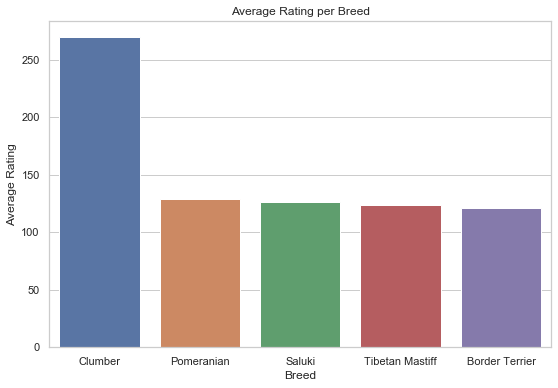

In [67]:
# Plot Top 5 Ratings per Breed
sns.set(style="whitegrid")
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='breed', y='mean_rating', data=df_top_ratings_breeds)
ax.set(xlabel='Breed', ylabel='Average Rating', title='Average Rating per Breed')
plt.show()

From the bar chart below we can attest that Clumber have more than twice the average rating of the other 4 breeds. Again, this may be due to low ratings for this specific breed. 

Let's confirm this information.

In [68]:
breeds_ratings[breeds_ratings['photo_desc'] == 'Clumber']

,tweet_id,rating,photo_desc
217,778027034220126208,270.0,Clumber


As suspected, there is only [one tweet](https://twitter.com/dog_rates/status/778027034220126208) where this breed was identified.